In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [2]:
# read the four data files
rr_2016 = parse_gpx('data/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('data/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('data/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('data/Calga_TT_2019.gpx')

In [3]:
tt_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0


In [4]:
tt_2016.shape

(1541, 11)

In [5]:
tt_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0


In [6]:
tt_2019.shape

(2655, 11)

In [7]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


In [8]:
rr_2016.shape

(2822, 11)

In [9]:
rr_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0


In [10]:
rr_2019.shape

(5503, 11)

## Data Exploring and Data Cleaning

### Summay of Total Distance:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.

In [11]:
total_distance_rr2016 = rr_2016.distance.sum()
total_distance_tt2016 = tt_2016.distance.sum()
total_distance_rr2019 = rr_2019.distance.sum()
total_distance_tt2019 = tt_2019.distance.sum()

In [12]:
total_distance = pd.DataFrame({'Total Distance (km)':[total_distance_rr2016, total_distance_tt2016, total_distance_rr2019, total_distance_tt2019]}, 
                              index=['rr2016', 'tt2016', 'rr2019', 'tt2019'])
total_distance.round(2)

,Total Distance (km)
rr2016,49.05
tt2016,24.80
rr2019,51.79
tt2019,24.38


From the summary above, total distances in road races are around double of time trials in both 2016 and 2019 because road races include two laps.

### Summary of Speeds:
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  

In [13]:
speed_rr2016 = rr_2016.speed.describe()
speed_tt2016 = tt_2016.speed.describe()
speed_rr2019 = rr_2019.speed.describe()
speed_tt2019 = tt_2019.speed.describe()

In [14]:
speed_summary = pd.DataFrame(data=[speed_rr2016, speed_tt2016, speed_rr2019, speed_tt2019], index=['rr2016', 'tt2016', 'rr2019', 'tt2019'])
speed_summary.round(2)

,count,mean,std,min,25%,50%,75%,max
rr2016,2822.0,34.93,10.74,0.0,26.66,33.31,42.87,92.75
tt2016,1541.0,33.53,11.52,0.0,25.07,32.84,41.47,162.51
rr2019,5503.0,33.88,8.85,0.0,28.22,33.04,38.64,70.37
tt2019,2655.0,33.06,9.77,0.0,26.44,33.22,39.29,63.30


Road races are faster than time trials in both 2016 and 2019 with an average speed of 1.4km/h faster in 2016 and 0.82km/h faster in 2019. However, the maximum speed for time trials in 2016 is 162.51km/h, which is unreasonably higher than others. It could be an outlier. 

**Drop the outlier in tt_2016 dataset:**

In [15]:
tt_2016n = tt_2016.drop(tt_2016.index[tt_2016['speed'] >= 162], inplace = False)

In [16]:
speed_tt2016n = tt_2016n.speed.describe()

**Summary of speeds after removal of outlier in tt_2016:**

In [17]:
speed_summary2 = pd.DataFrame(data=[speed_rr2016, speed_tt2016n, speed_rr2019, speed_tt2019], index=['rr2016', 'tt2016n', 'rr2019', 'tt2019'])
speed_summary2.round(2)

,count,mean,std,min,25%,50%,75%,max
rr2016,2822.0,34.93,10.74,0.0,26.66,33.31,42.87,92.75
tt2016n,1540.0,33.45,11.04,0.0,25.07,32.84,41.44,67.86
rr2019,5503.0,33.88,8.85,0.0,28.22,33.04,38.64,70.37
tt2019,2655.0,33.06,9.77,0.0,26.44,33.22,39.29,63.30


After removing the outlier, road races are still faster than time trials in both 2016 and 2019 with an average speed of 1.48km/h faster in 2016 and 0.82km/h faster in 2019. As shown in table above, the range of speeds for road races are larger than time trials in both years. The maximum speed in road race is 92.75km/h, which is 24.89km/h higher than time trial in 2016. Whereas, the maximum speed in road race is 70.37km/h, which is 7.07km/h higher than time trial in 2019. The maximum speed for road race in 2016 is higher than that in 2019.

In [18]:
avg_speed_rr2016 = rr_2016.speed.mean()
avg_speed_tt2016n = tt_2016n.speed.mean()
avg_speed_rr2019 = rr_2019.speed.mean()
avg_speed_tt2019 = tt_2019.speed.mean()

In [19]:
avg_speed = pd.DataFrame({'Average Speed (km/h)':[avg_speed_rr2016, avg_speed_tt2016n, avg_speed_rr2019, avg_speed_tt2019]}, 
                         index=['rr2016', 'tt2016n', 'rr2019', 'tt2019'])
avg_speed.round(2)

,Average Speed (km/h)
rr2016,34.93
tt2016n,33.45
rr2019,33.88
tt2019,33.06


The average speeds in the two time trials are 33.45km/h in 2016 and 33.06km/h in 2019 respectively. The speed is on average 0.39km/h faster in 2016.

## Data Visualization: time trials

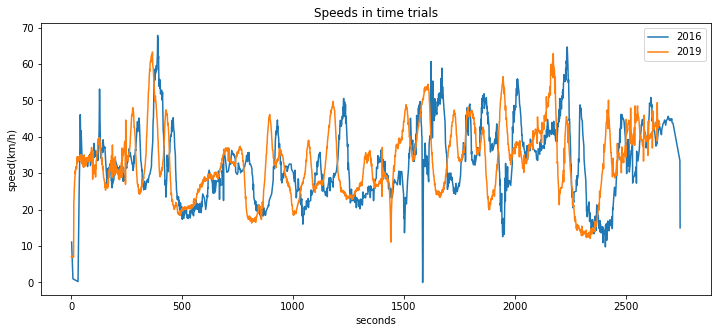

In [20]:
plt.figure(figsize = (12, 5)) 
plt.plot(tt_2016n.timedelta.cumsum(), tt_2016n.speed, label=2016)
plt.plot(tt_2019.timedelta.cumsum(), tt_2019.speed, label=2019)
plt.title("Speeds in time trials")
plt.xlabel("seconds")
plt.ylabel("speed(km/h)")
plt.legend()

From the line plot, it can be seen that both time trials have similar accelerate pattern in speed. Also, time trial in 2019 was completed earlier than 2016.

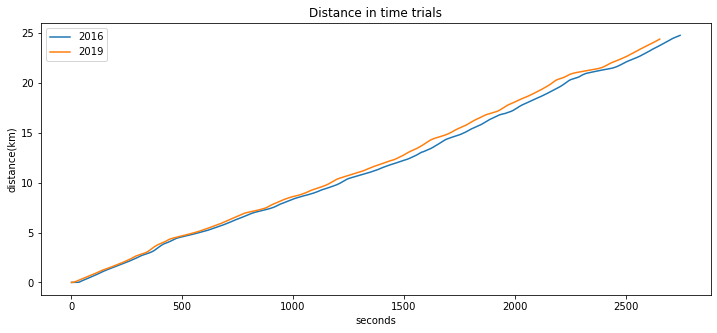

In [21]:
plt.figure(figsize = (12, 5)) 
plt.plot(tt_2016n.timedelta.cumsum(), tt_2016n.distance.cumsum(), label=2016)
plt.plot(tt_2019.timedelta.cumsum(), tt_2019.distance.cumsum(), label=2019)
plt.title("Distance in time trials")
plt.xlabel("seconds")
plt.ylabel("distance(km)")
plt.legend()

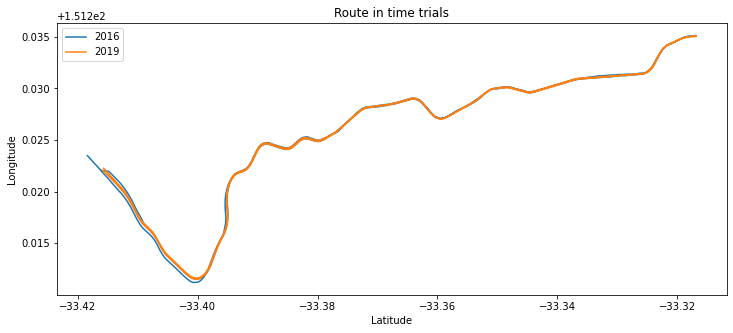

In [22]:
plt.figure(figsize = (12, 5)) 
plt.plot(tt_2016n.latitude, tt_2016n.longitude, label=2016)
plt.plot(tt_2019.latitude, tt_2019.longitude, label=2019)
plt.title("Route in time trials")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()

## Climbing, Flat or Descending
* From the elevation_gain field you can see whether the rider is climbing , descending or on the flat. Use this to calculate the average speeds in those three cases (climbing, flat or descending). 

In [23]:
climbing_tt_2016n = tt_2016n.loc[tt_2016n["elevation_gain"] > 0]
descending_tt_2016n = tt_2016n.loc[tt_2016n["elevation_gain"] < 0]
flat_tt_2016n = tt_2016n.loc[tt_2016n["elevation_gain"] == 0]

In [24]:
climbing_rr_2016 = rr_2016.loc[rr_2016["elevation_gain"] > 0]
descending_rr_2016 = rr_2016.loc[rr_2016["elevation_gain"] < 0]
flat_rr_2016 = rr_2016.loc[rr_2016["elevation_gain"] == 0]

In [25]:
climbing_tt_2019 = tt_2019.loc[tt_2019["elevation_gain"] > 0]
descending_tt_2019 = tt_2019.loc[tt_2019["elevation_gain"] < 0]
flat_tt_2019 = tt_2019.loc[tt_2019["elevation_gain"] == 0]

In [26]:
climbing_rr_2019 = rr_2019.loc[rr_2019["elevation_gain"] > 0]
descending_rr_2019 = rr_2019.loc[rr_2019["elevation_gain"] < 0]
flat_rr_2019 = rr_2019.loc[rr_2019["elevation_gain"] == 0]

In [27]:
avg_speed_by_cases = pd.DataFrame(
    {
        "tt_2016n": [climbing_tt_2016n.speed.mean(), descending_tt_2016n.speed.mean(), flat_tt_2016n.speed.mean()],
        "rr_2016": [climbing_rr_2016.speed.mean(), descending_rr_2016.speed.mean(), flat_rr_2016.speed.mean()],
        "tt_2019": [climbing_tt_2019.speed.mean(), descending_tt_2019.speed.mean(), flat_tt_2019.speed.mean()],
        "rr_2019": [climbing_rr_2019.speed.mean(), descending_rr_2019.speed.mean(), flat_rr_2019.speed.mean()],
    },
    index=["climbing", "descending", "flat"]
)

index = avg_speed_by_cases.index
index.name = "Average Speeds(km/h)"
avg_speed_by_cases.round(2)


,tt_2016n,rr_2016,tt_2019,rr_2019
Average Speeds(km/h),,,,
climbing,24.58,26.39,26.03,28.82
descending,44.88,45.93,42.66,41.17
flat,33.97,34.38,33.30,33.46


The above table summarised the average speeds in climbing, descending and flat cases for time trials and road races in 2016 and 2019. The average speeds when descending is the highest, followed by flat, then climbing. 

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





### Development

In [28]:
# speed (km/h) --> speed: km*100/h*60 --> m/min
# cadence(no.of rotation/min)
# development = cadence/speed --> no.of rotation/min / m/min  --> no.of rotation/m
tt_2016n["development"] = tt_2016n["cadence"] / (tt_2016n["speed"]*100/60)
rr_2016["development"] = rr_2016["cadence"] / (rr_2016["speed"]*100/60)
tt_2019["development"] = tt_2019["cadence"] / (tt_2019["speed"]*100/60)
rr_2019["development"] = rr_2019["cadence"] / (rr_2019["speed"]*100/60)

rr_2019.development.describe()

count    5503.000000
mean             inf
std              NaN
min         0.000000
25%         1.145465
50%         1.476301
75%         1.744705
max              inf
Name: development, dtype: float64

In [29]:
tt_2016n_development = tt_2016n[(tt_2016n["development"] >=2) & (tt_2016n["development"] <= 10)]
rr_2016_development = rr_2016[(rr_2016["development"] >=2) & (rr_2016["development"] <= 10)]
tt_2019_development = tt_2019[(tt_2019["development"] >=2) & (tt_2019["development"] <= 10)]
rr_2019_development = rr_2019[(rr_2019["development"] >=2) & (rr_2019["development"] <= 10)]


rr_2019_development.development.describe()

count    576.000000
mean       2.320649
std        0.253236
min        2.000306
25%        2.120810
50%        2.255051
75%        2.497323
max        3.106660
Name: development, dtype: float64

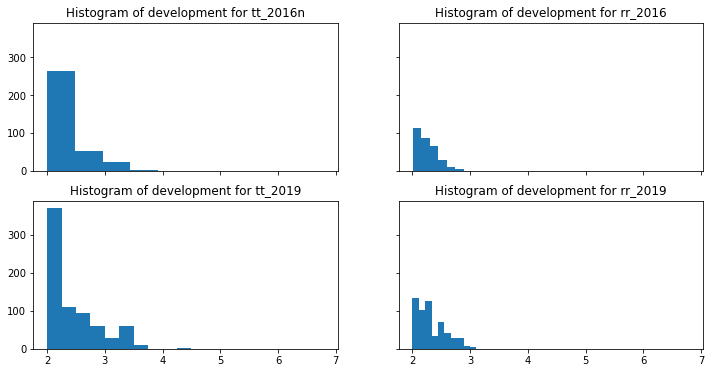

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,6), sharex = True, sharey = True)
ax1.hist(tt_2016n_development.development)
ax2.hist(rr_2016_development.development)
ax3.hist(tt_2019_development.development)
ax4.hist(rr_2019_development.development)

ax1.title.set_text('Histogram of development for tt_2016n')
ax2.title.set_text('Histogram of development for rr_2016')
ax3.title.set_text('Histogram of development for tt_2019')
ax4.title.set_text('Histogram of development for rr_2019')

plt.show()

From the histograms above, the development patterns are similar in all rides. Large proportion of low development indicates the rider was climbing hills at most of the time. Time trials has nearly double counts than road races because the rider rided the route twice in time trials. 
